In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
'''
Exercise Data
'''
data = pd.read_csv("db.csv")

X = data.iloc[:,0:7]
y = data.iloc[:,8]

random_state = np.random.RandomState(10)
n_samples, n_features = X.shape
X = X + (random_state.randn(n_samples, n_features))

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=3)

#Transform data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

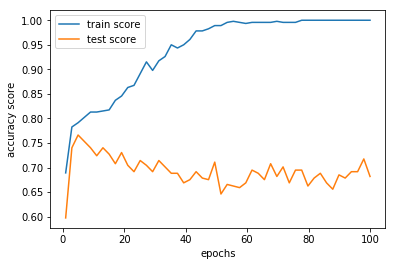

In [3]:
epochs = np.linspace(1, 100, 50)
train_score = []
test_score = []
loss = []

for epoch in epochs:
    NN_model = MLPClassifier(hidden_layer_sizes=(500), max_iter=epoch,solver='lbfgs')
    NN_model.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, NN_model.predict(X_train)))
    test_score.append(accuracy_score(y_test, NN_model.predict(X_test)))
    loss.append(NN_model.loss_)

plt.plot(epochs, train_score, label='train score')
plt.plot(epochs, test_score, label='test score')
plt.xlabel('epochs')
plt.ylabel('accuracy score')
plt.legend()
plt.show()

C:\Users\dnly\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


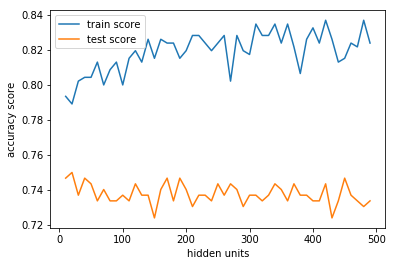

In [4]:
units = range(10, 500, 10)
train_score2 = []
test_score2 = []
loss2 = []

for unit in units:
    NN_model2 = MLPClassifier(hidden_layer_sizes=(unit),solver='adam')
    NN_model2.fit(X_train, y_train)
    train_score2.append(accuracy_score(y_train, NN_model2.predict(X_train)))
    test_score2.append(accuracy_score(y_test, NN_model2.predict(X_test)))
    loss2.append(NN_model2.loss_)

plt.plot(units, train_score2, label='train score')
plt.plot(units, test_score2, label='test score')
plt.xlabel('hidden units')
plt.ylabel('accuracy score')
plt.legend()
plt.show()

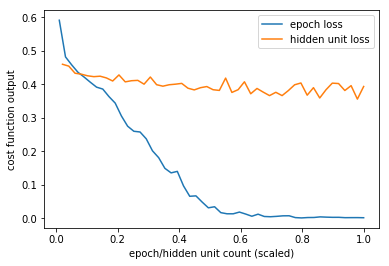

In [5]:
plt.figure()
plt.plot(epochs/max(epochs), loss, label='epoch loss')
plt.plot(np.array(units)/max(units), loss2, label='hidden unit loss')
plt.xlabel('epoch/hidden unit count (scaled)')
plt.ylabel('cost function output')
plt.legend()
plt.show()